In [1]:
import os
os.chdir("C:\\Users\\Venki\\Desktop\\data science\\All data")

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# Q1

In [4]:
startups=pd.read_csv('50_Startups.csv')

In [5]:
startups.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
startups.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
st = startups.rename({'R&D Spend': 'RDS','Administration': 'ADM','Marketing Spend': 'MKS'}, axis=1)

In [10]:
st.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Correlation

In [11]:
st.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


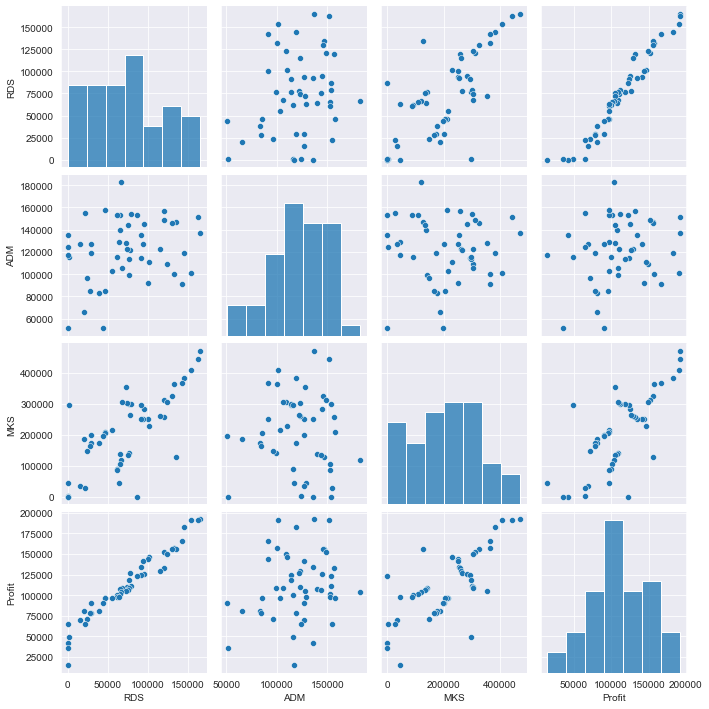

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(st)

# Model 

In [13]:
model = smf.ols('Profit~RDS+ADM+MKS',data=st).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        16:14:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
slr_adm = smf.ols('Profit~ADM',data=st).fit()

In [16]:
slr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.162
Time:                        16:15:11   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after building SLR for Adm, we can see that it dosen't have significant p value.

In [17]:
slr_mar = smf.ols('Profit~MKS',data=st).fit()

In [18]:
slr_mar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.38e-10
Time:                        16:17:55   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKS            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

since p value is less than 0.05 , this column as siginificance.

# Checking collinearity

In [19]:
slr_AM = smf.ols('Profit~ADM+MKS',data=st).fit()

In [20]:
slr_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.50e-10
Time:                        16:24:13   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after checking it together we can see both have significance value

# VIF Calculation

In [21]:
rsq_rds = smf.ols('RDS~ADM+MKS',data=st).fit().rsquared  
vif_rds = 1/(1-rsq_rds) 
vif_rds

2.4689030699947017

In [22]:
rsq_adm = smf.ols('ADM~RDS+MKS',data=st).fit().rsquared  
vif_adm = 1/(1-rsq_adm) 
vif_adm

1.1750910070550458

In [23]:
rsq_mks = smf.ols('MKS~RDS+ADM',data=st).fit().rsquared  
vif_mks = 1/(1-rsq_mks) 
vif_mks

2.3267732905308773

In [24]:
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

# Residual Analysis


# Test for Normality of Residuals (Q-Q Plot)

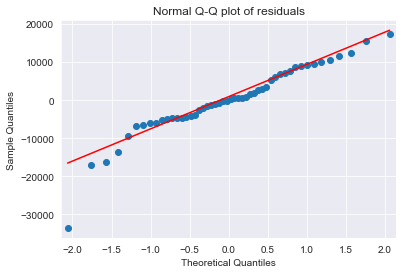

In [25]:
import statsmodels.api as sm
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

# Homoscedasticity

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

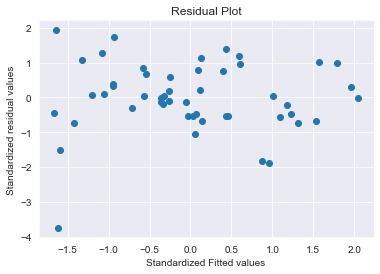

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


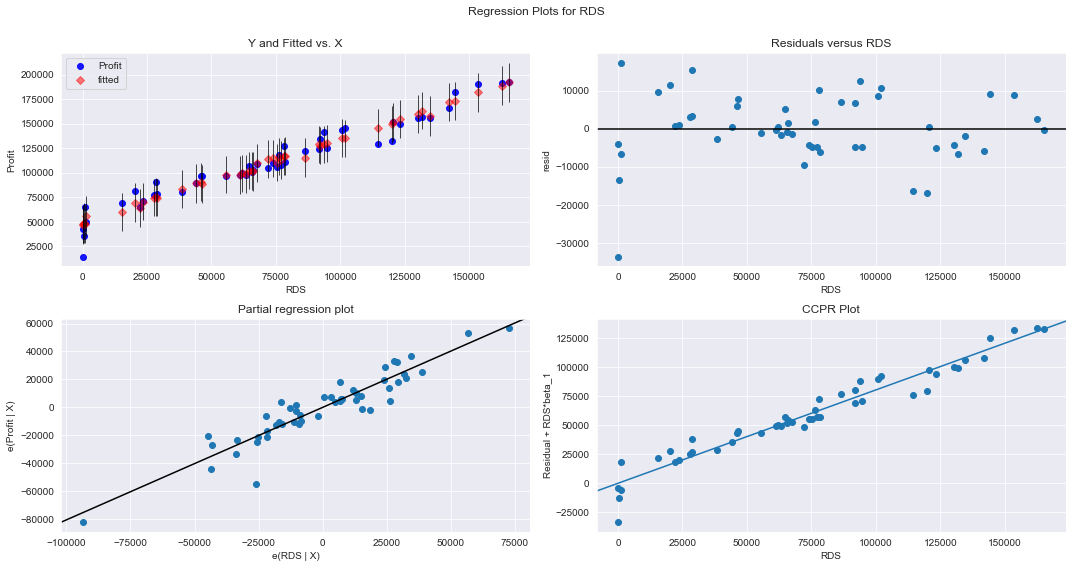

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


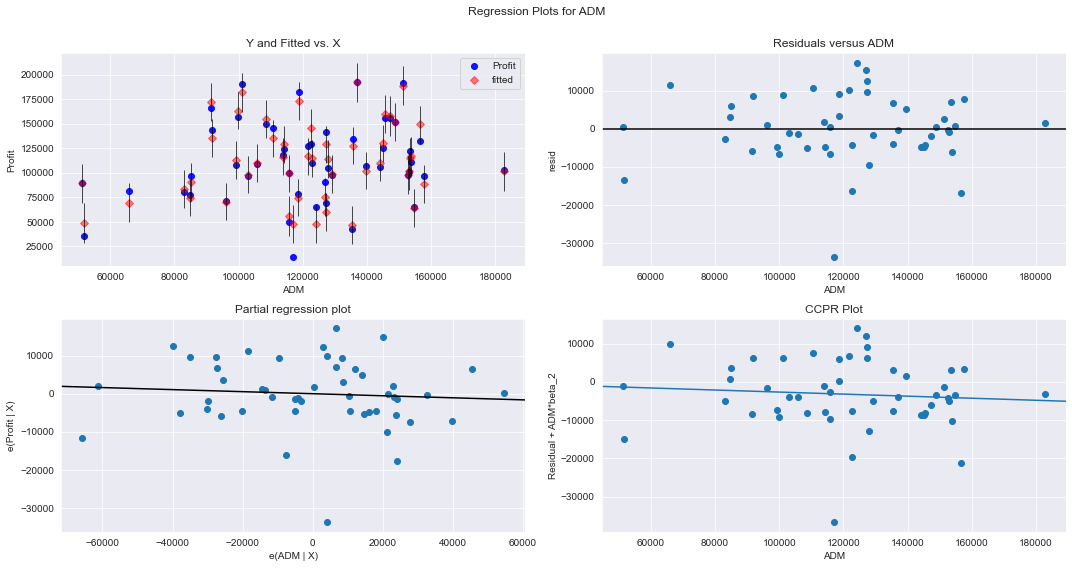

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

eval_env: 1


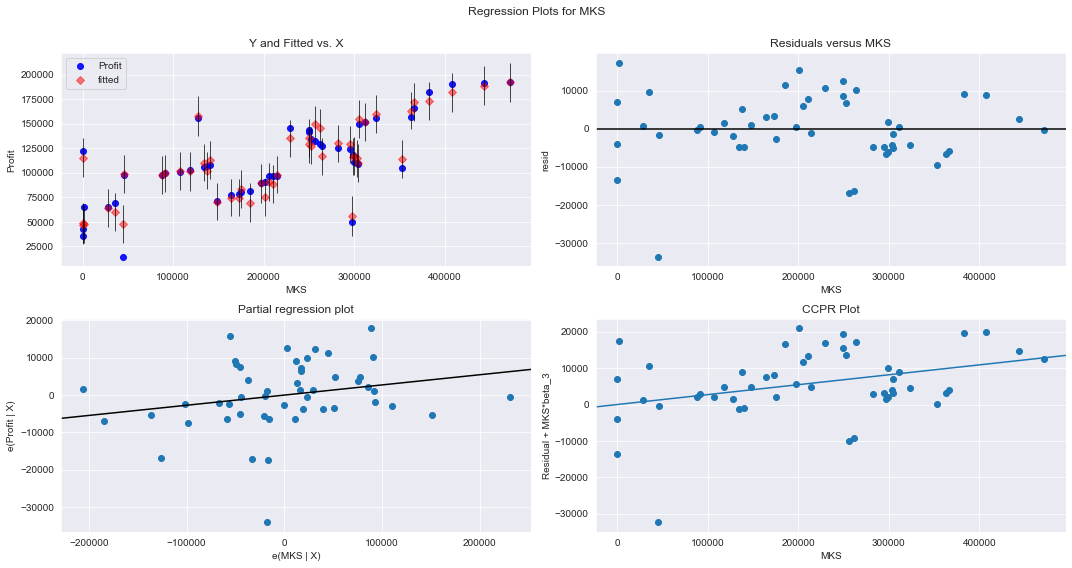

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

# Detecting Influuencers and Outliers

In [32]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

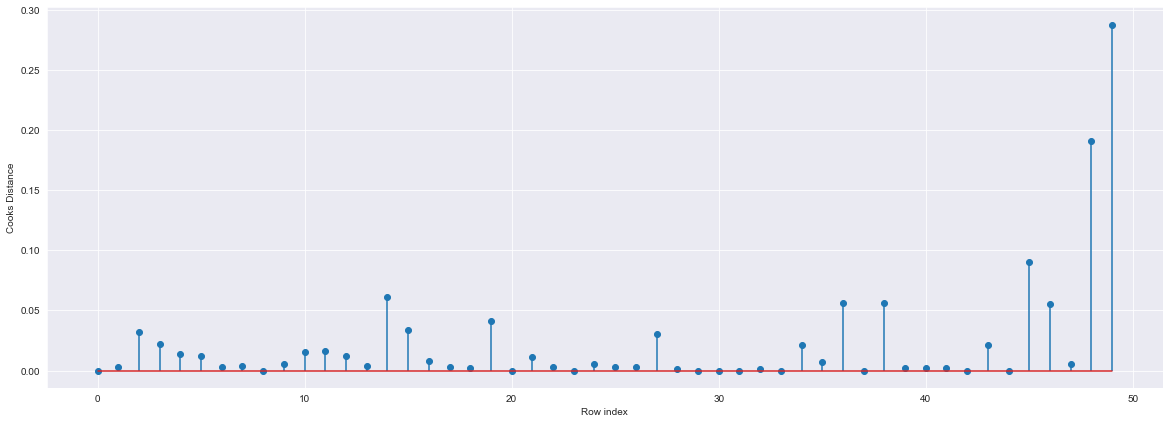

In [33]:
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(st)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
st.shape

(50, 5)

In [35]:
k = st.shape[1]
n = st.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

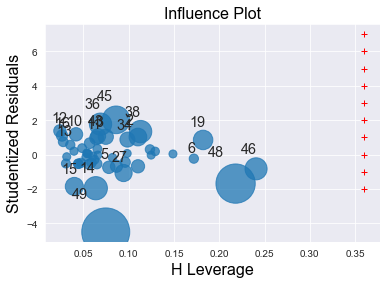

In [36]:
influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [37]:
st[st.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [38]:
st1=st.copy()

In [39]:
st1.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
st1=st.drop(st.index[[49]],axis=0).reset_index(drop=True)
st1

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
finalmodel = smf.ols('Profit~RDS+ADM+MKS',data=st1).fit()

In [42]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        16:35:57   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKS            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predictions

In [43]:
newdata=pd.DataFrame({'RDS':165349.20,'ADM':136897.80,'MKS':471784.10},index=[1])
newdata

,RDS,ADM,MKS
1,165349.2,136897.8,471784.1


In [44]:
finalmodel.predict(newdata)

1    190716.676999
dtype: float64

In [45]:
pred_y=finalmodel.predict(st1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

checking R square values of model and final model

In [46]:
model.rsquared

0.9507459940683246

In [47]:
finalmodel.rsquared

0.9613162435129847

# Q2

In [49]:
Corolla=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [50]:
Corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [51]:
corolla=Corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [52]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [53]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [55]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [59]:
cr=corolla.rename({'Age_08_04':'age','Quarterly_Tax':'tax'},axis=1)

In [60]:
cr.head()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [63]:
cr[cr.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [65]:
cr1=cr.drop_duplicates().reset_index(drop=True)

In [66]:
cr1.head()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Correlation

In [67]:
cr1.corr()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


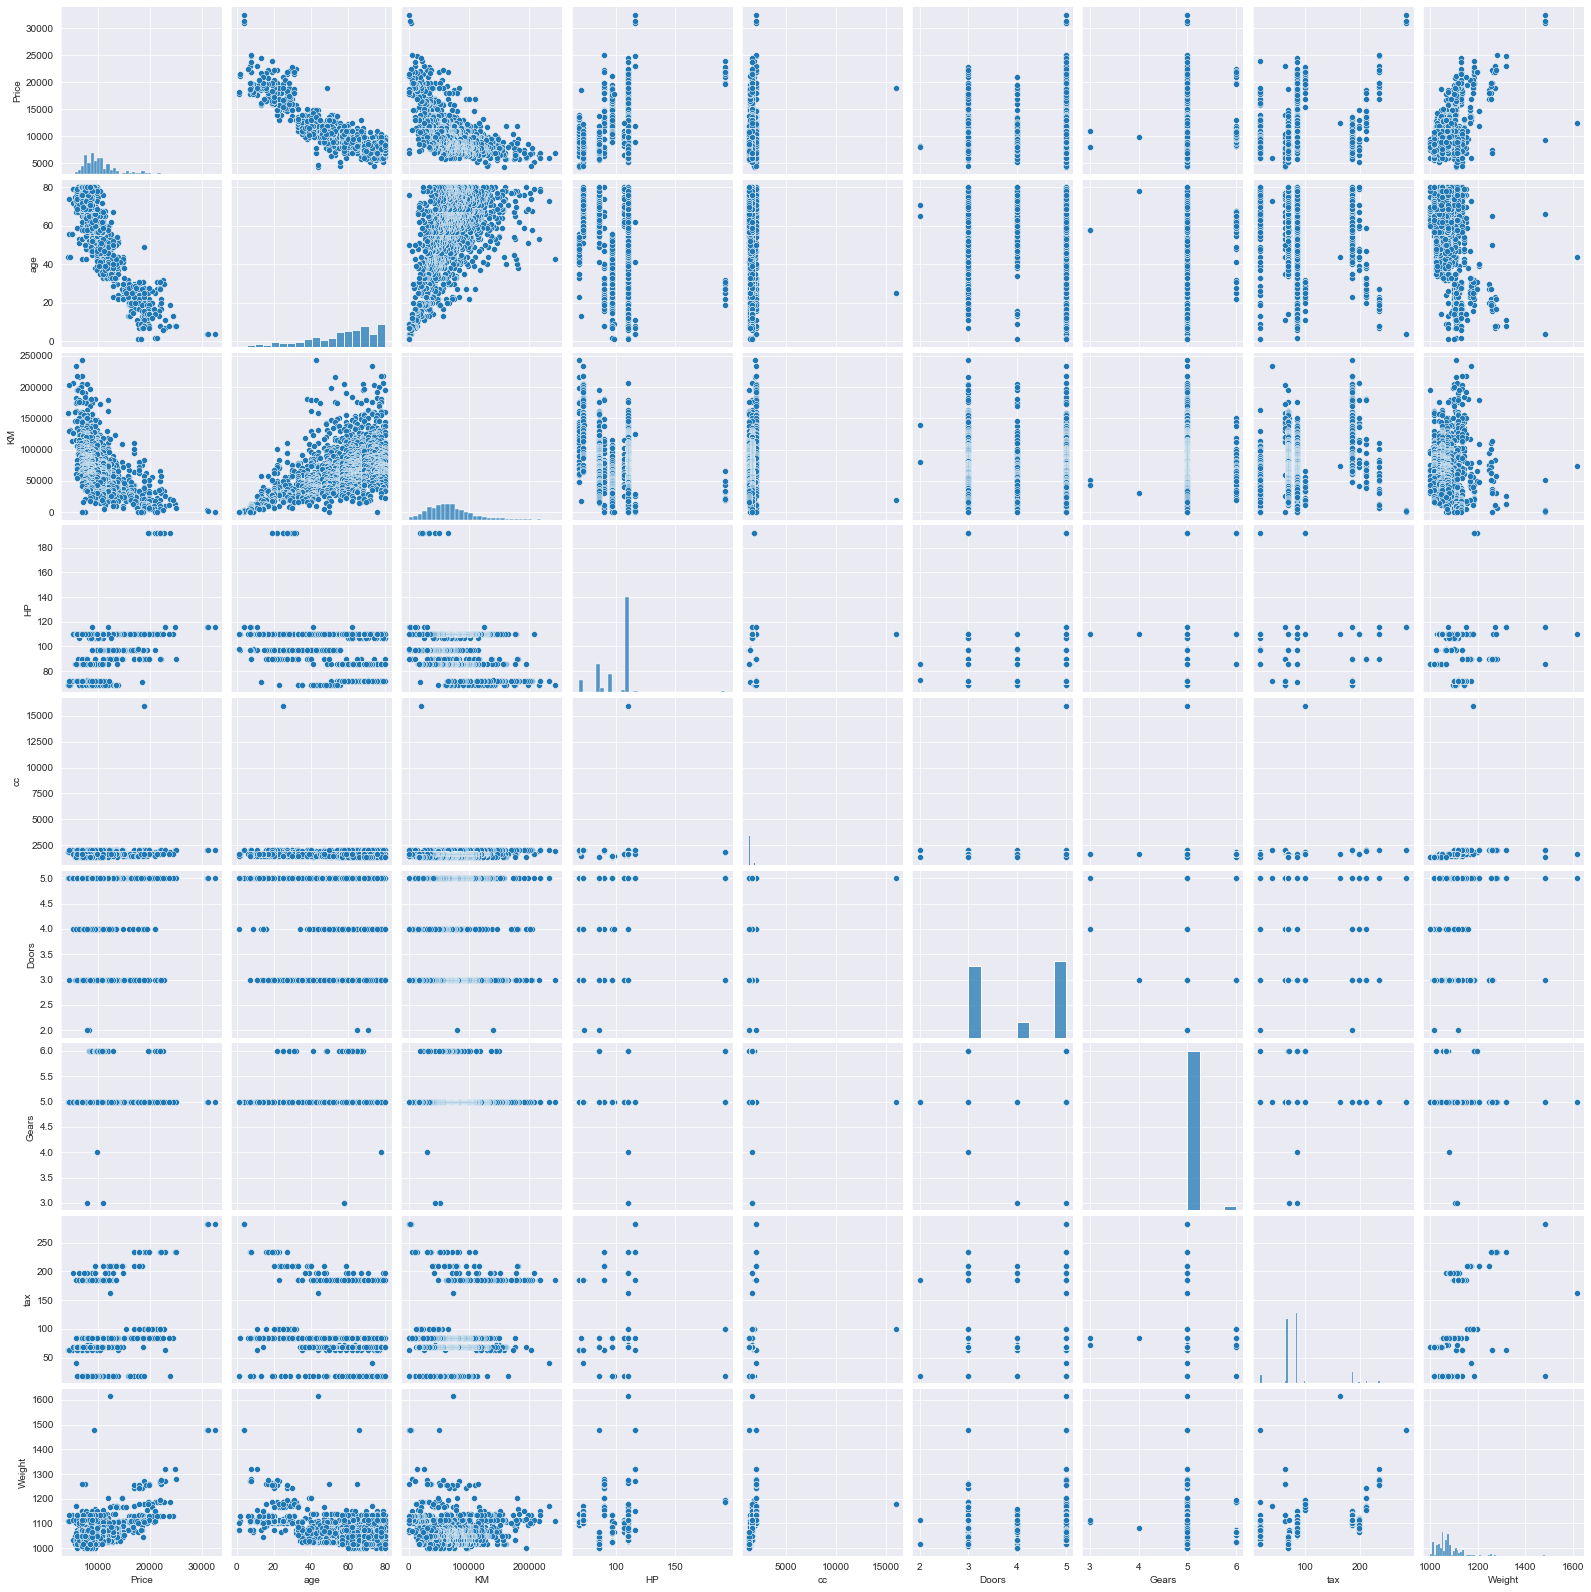

In [68]:
sns.set_style(style='darkgrid')
sns.pairplot(cr1)

# Model

In [69]:
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=cr1).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:02:28   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
slr_cc = smf.ols('Price~cc',data=cr1).fit()

In [72]:
slr_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.29e-06
Time:                        17:06:56   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 it is showing that cc has significance

In [73]:
slr_d = smf.ols('Price~Doors',data=cr1).fit()

In [75]:
slr_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.40e-12
Time:                        17:08:28   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

it is showing that Doors have significance

# Checking collinearity

In [76]:
slr_cd = smf.ols('Price~Doors+cc',data=cr1).fit()

In [77]:
slr_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.55e-15
Time:                        17:10:44   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
cc             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after checking it together we can see both have significance value

# VIF Calculation

In [80]:
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+tax+Weight',data=cr1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+tax+Weight',data=cr1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+tax+Weight',data=cr1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~age+KM+HP+Doors+Gears+tax+Weight',data=cr1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~age+KM+HP+cc+Gears+tax+Weight',data=cr1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~age+KM+HP+cc+Doors+tax+Weight',data=cr1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_tax=smf.ols('tax~age+KM+HP+cc+Doors+Gears+Weight',data=cr1).fit().rsquared
vif_tax=1/(1-rsq_tax)

rsq_WT=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+tax',data=cr1).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [81]:
d1={'Variables':['age','KM','HP','CC','Doors','Gears','tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_tax,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,tax,2.295375
7,Weight,2.487180


we can see that there is no collenearity >20, hence we should use all variable

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

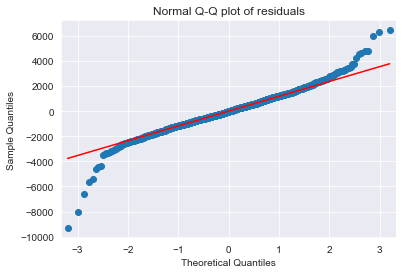

In [82]:
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [83]:
list(np.where(model.resid<-5000))

[array([190, 191, 220, 600, 959], dtype=int64)]

In [84]:
list(np.where(model.resid>5000))

[array([109, 146, 522], dtype=int64)]

# Homoscedasticity

In [85]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

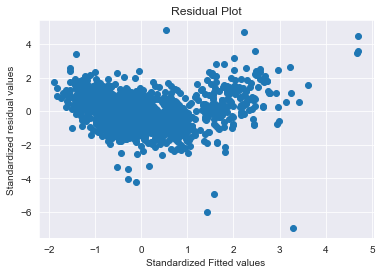

In [86]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


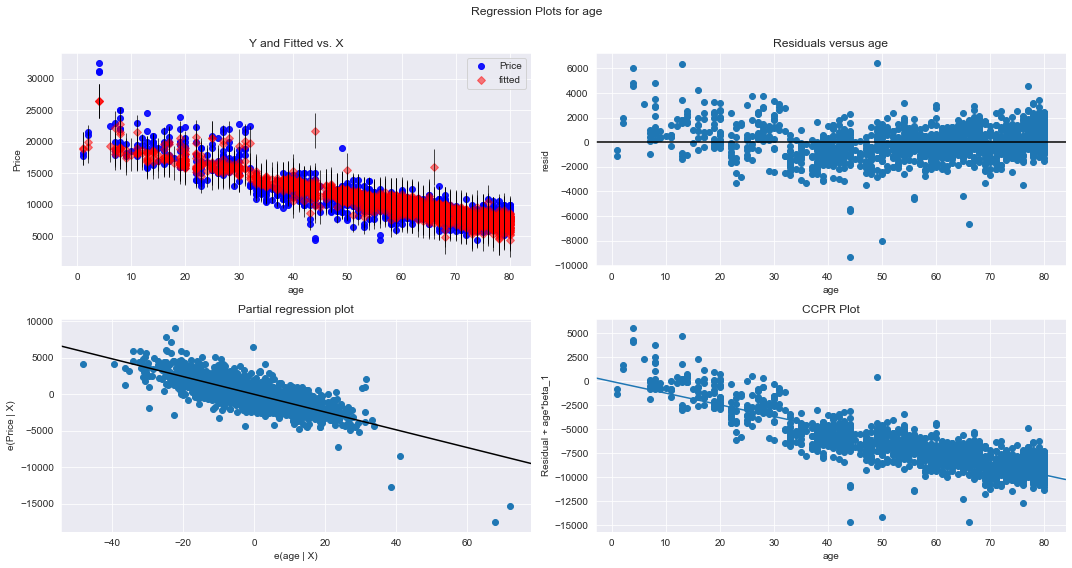

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

eval_env: 1


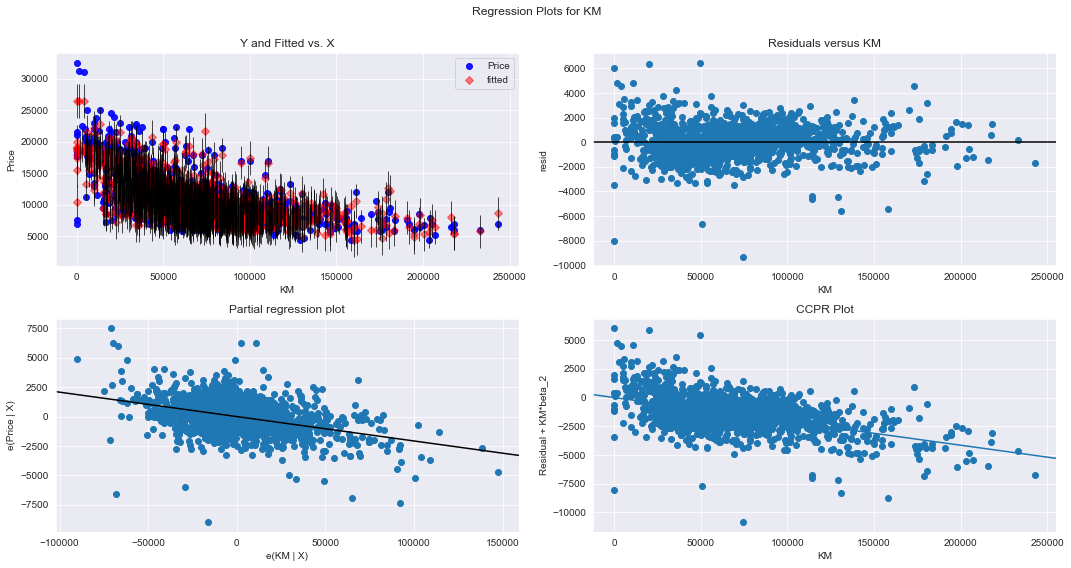

In [88]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


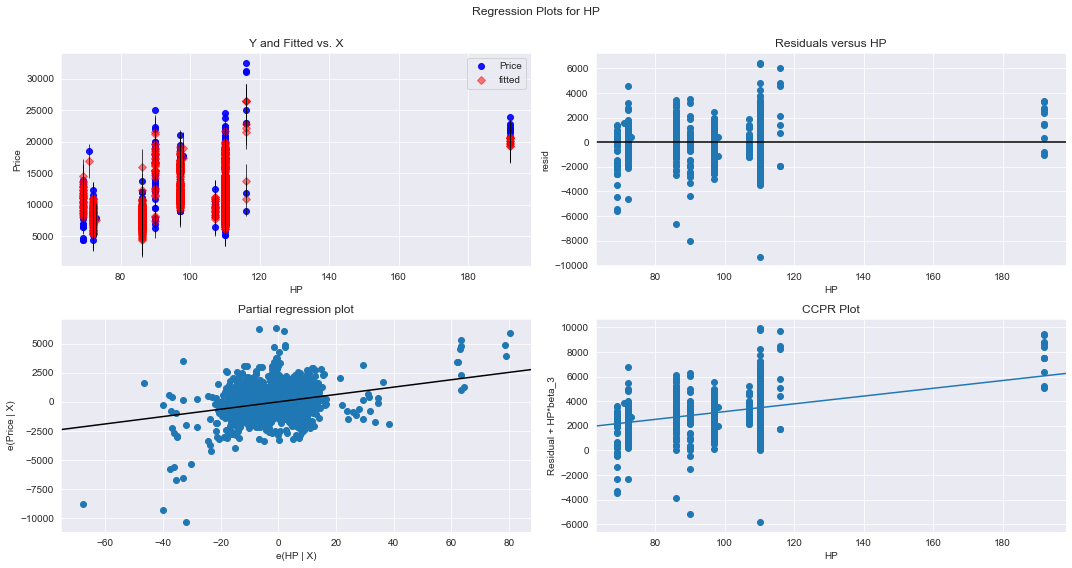

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


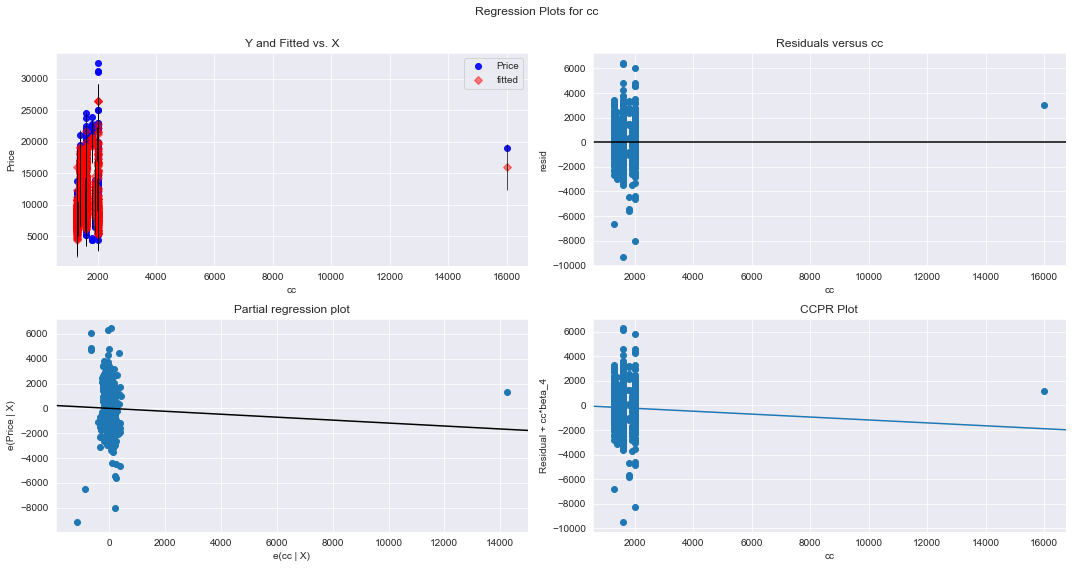

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


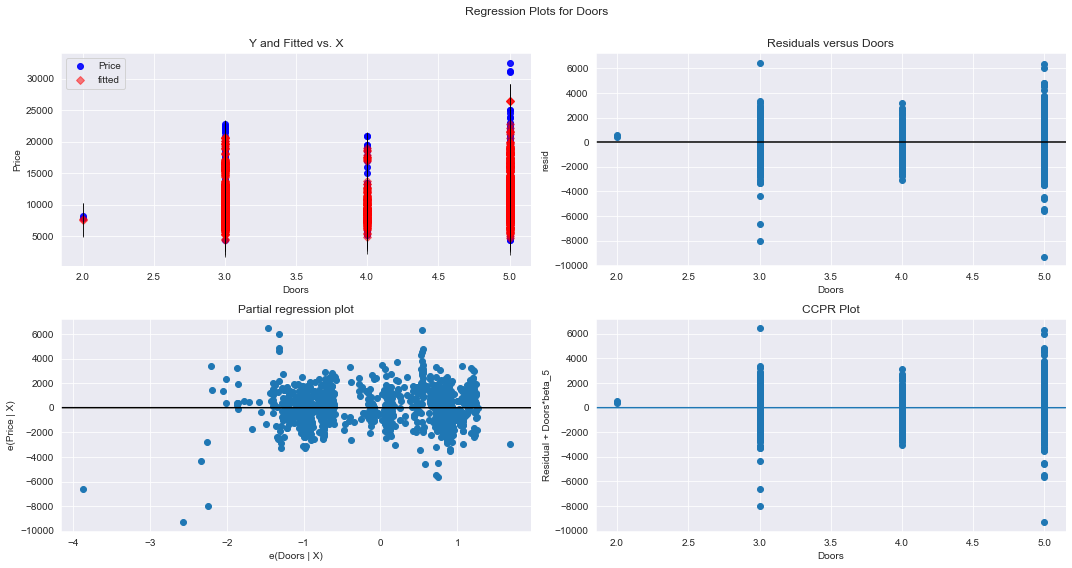

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


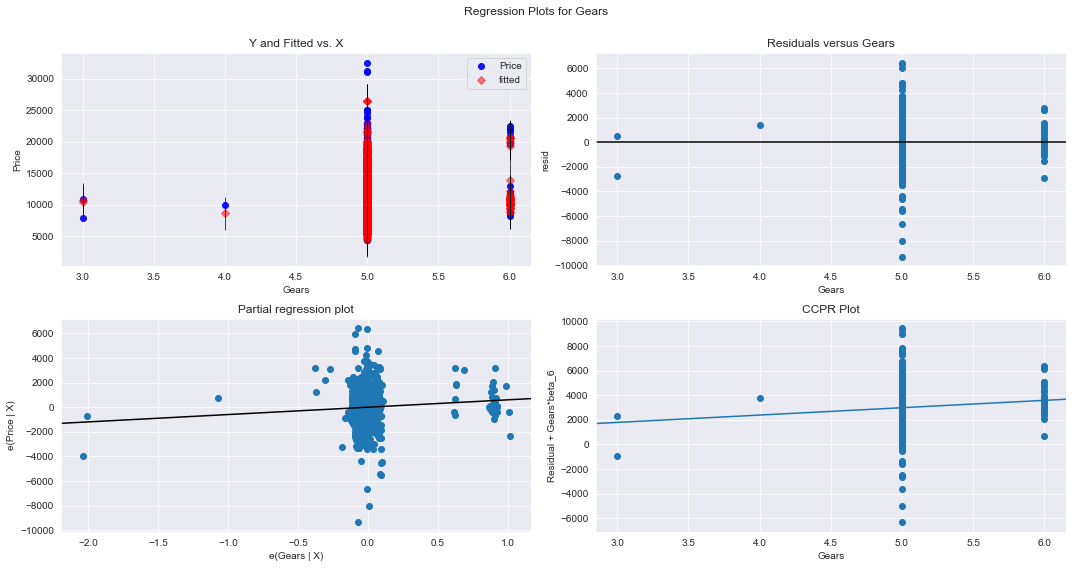

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


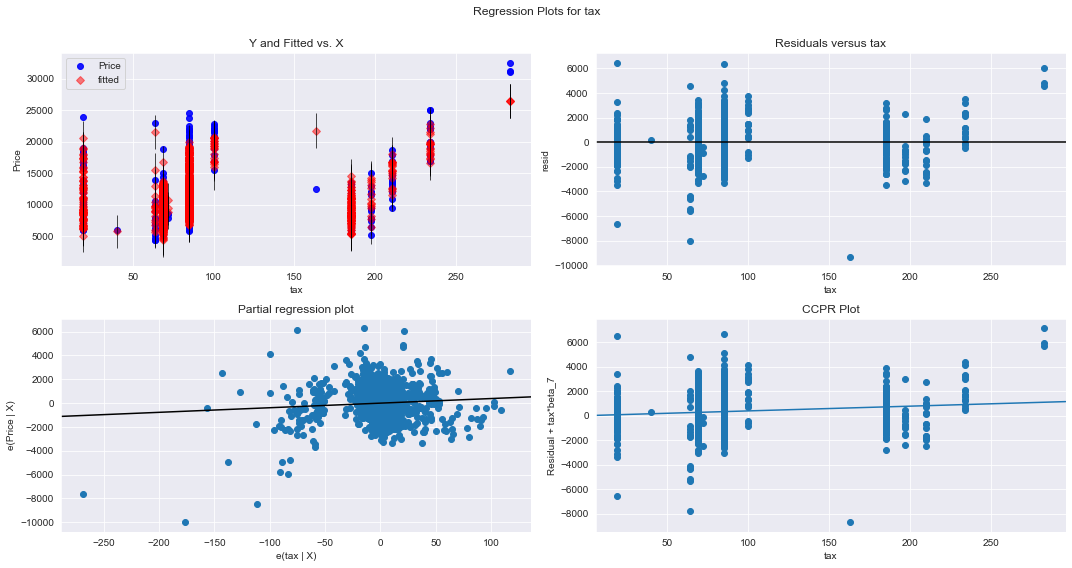

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "tax", fig=fig)
plt.show()

eval_env: 1


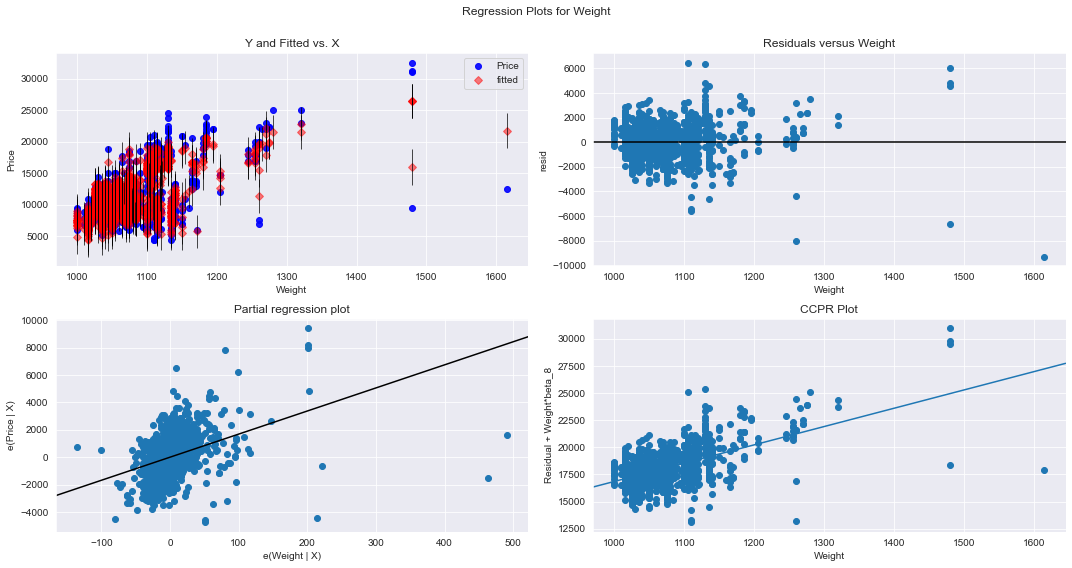

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Detecting Influuencers and Outliers

In [95]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

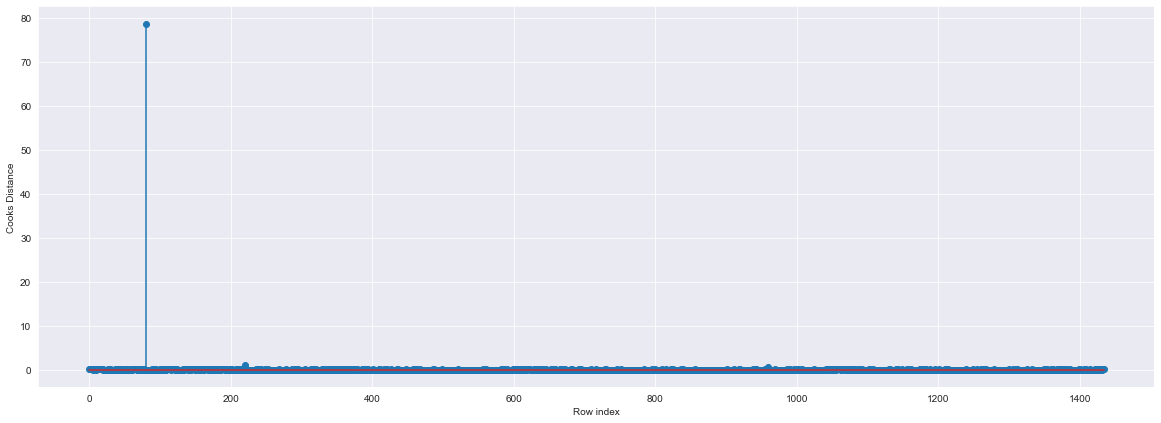

In [97]:
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cr1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
cr1.shape

(1435, 9)

In [101]:
k = cr1.shape[1]
n = cr1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

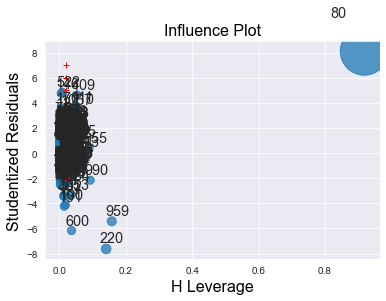

In [102]:
influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [103]:
cr1[cr1.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [104]:
cr2=cr1.copy()

In [105]:
cr2.head()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [111]:
cr3=cr2.drop(cr1.index[[80]],axis=0).reset_index(drop=True)
cr3

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


# Building Model

In [112]:
finalmodel = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=cr3).fit()

In [113]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:03:20   Log-Likelihood:                -12317.
No. Observations:                1433   AIC:                         2.465e+04
Df Residuals:                    1424   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6194.2409   1383.952     -4.476      0.000   -8909.045   -3479.437
age         -120.4619      2.562    -47.025      0.000    -125.487    -115.437
KM            -0.0178      0.001    -13.913      0.000      -0.020      -0.015
HP            39.2329      2.912     13.473      0.000      33.521      44.945
cc            -2.5112      0.307     -8.170      0.000      -3.114      -1.908
Doors        -27.3280     39.242     -0.696      0.486    -104.306      49.650
Gears        527.1386    192.826      2.734      0.006     148.884     905.393
tax            8.9540      1.427      6.276      0.000       6.156      11.753
Weight        20.0594      1.118     17.941      0.000      17.866      22.253
==============================================================================
Omnibus:                      241.630   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2636.931
Skew:                          -0.424   Prob(JB):                         0.00
Kurtosis:                       9.591   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model_influence_V = finalmodel.get_influence()
(c, _) = model_influence_V.cooks_distance

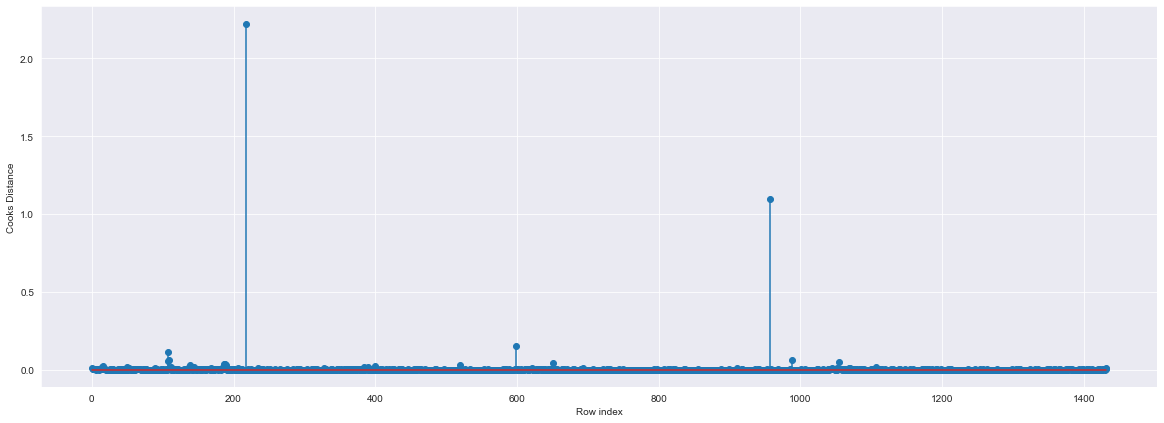

In [118]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cr3)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [119]:
(np.argmax(c),np.max(c))

(218, 2.2243922310558513)

In [124]:
cr3=cr3.drop(cr3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
cr3

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [125]:
finalmodel1 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=cr3).fit()

In [128]:
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1261.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:30:41   Log-Likelihood:                -12253.
No. Observations:                1431   AIC:                         2.452e+04
Df Residuals:                    1422   BIC:                         2.457e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.016e+04   1398.553     -7.263      0.000   -1.29e+04   -7414.065
age         -116.6394      2.511    -46.444      0.000    -121.566    -111.713
KM            -0.0172      0.001    -13.896      0.000      -0.020      -0.015
HP            39.2423      2.818     13.923      0.000      33.714      44.771
cc            -3.1934      0.305    -10.457      0.000      -3.792      -2.594
Doors        -64.8834     38.187     -1.699      0.090    -139.793      10.026
Gears        487.0940    186.661      2.610      0.009     120.934     853.255
tax            7.9121      1.385      5.714      0.000       5.196      10.628
Weight        24.9384      1.190     20.957      0.000      22.604      27.273
==============================================================================
Omnibus:                      194.833   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1728.241
Skew:                          -0.306   Prob(JB):                         0.00
Kurtosis:                       8.349   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
model_influence_V = finalmodel1.get_influence()
(c, _) = model_influence_V.cooks_distance

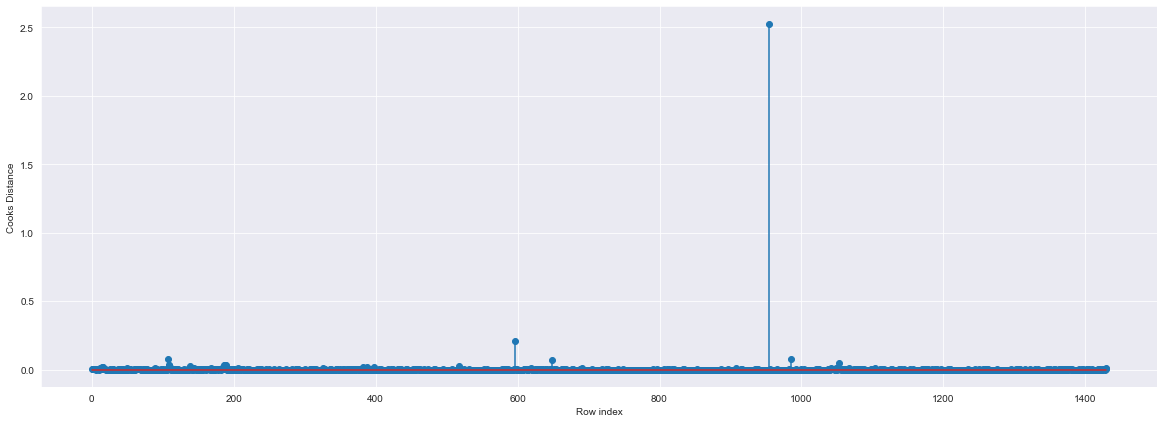

In [130]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cr3)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [131]:
np.argmax(c)

955

In [132]:
cr3=cr3.drop(cr3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
cr3

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [134]:
finalmodel2 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=cr3).fit()

In [135]:
finalmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1351.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:32:37   Log-Likelihood:                -12201.
No. Observations:                1430   AIC:                         2.442e+04
Df Residuals:                    1421   BIC:                         2.447e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.466e+04   1436.934    -10.204      0.000   -1.75e+04   -1.18e+04
age         -112.0675      2.483    -45.134      0.000    -116.938    -107.197
KM            -0.0169      0.001    -14.098      0.000      -0.019      -0.015
HP            36.5905      2.748     13.315      0.000      31.200      41.981
cc            -3.7860      0.303    -12.507      0.000      -4.380      -3.192
Doors       -122.1900     37.528     -3.256      0.001    -195.806     -48.574
Gears        466.3443    181.070      2.575      0.010     111.152     821.537
tax            5.1907      1.373      3.780      0.000       2.497       7.885
Weight        30.5446      1.296     23.566      0.000      28.002      33.087
==============================================================================
Omnibus:                      121.097   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              699.373
Skew:                          -0.076   Prob(JB):                    1.36e-152
Kurtosis:                       6.423   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hence our model accuracy increased to 0.884

# Model Pridiction

In [142]:
new_data=pd.DataFrame({'age':12,"KM":50000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"tax":69,"Weight":2012},index=[0])
new_data

,age,KM,HP,cc,Doors,Gears,tax,Weight
0,12,50000,80,1300,4,5,69,2012


In [143]:
finalmodel2.predict(new_data)

0    44808.141961
dtype: float64

In [144]:
pred_y=finalmodel.predict(cr3)
pred_y

0       16511.564283
1       16050.220805
2       16484.878613
3       16132.152228
4       15919.487734
            ...     
1425     8970.495628
1426     8435.964388
1427     8591.696811
1428     8713.936454
1429     9963.608983
Length: 1430, dtype: float64

checking R square values of model and final model

In [145]:
model.rsquared

0.8625200256947

In [146]:
finalmodel2.rsquared

0.8838066433786013